In [3]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 52.4 MB/s eta 0:00:00


In [4]:
import visualkeras

from keras.datasets import mnist
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np

 Carrega os dados do dataset MNIST

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Plota 4 imagens de exemplo em escala de cinza

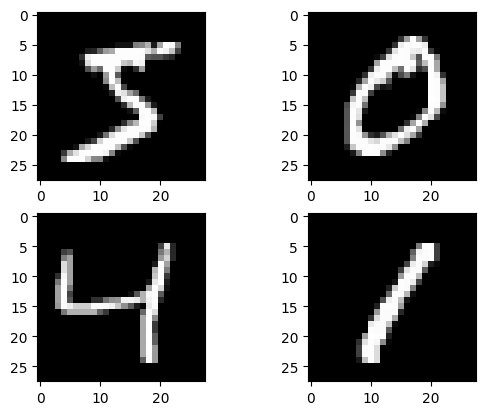

In [6]:
plt.figure(0)
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
#Mostra o as imagens
plt.show()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
print(y_train[0])
print(y_train[1])
print(y_train[2])
print(y_train[3])

5
0
4
1


Apenas ajusta a matriz para as dimensões esperadas do TensorFlow

In [11]:
set(y_train)

{np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9)}

In [12]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print(input_shape)
# Normaliza as entradas de 0-255 para 0-1
X_train = X_train / 255
X_test = X_test / 255


(28, 28, 1)


In [13]:
# Gera os vetores com as classes do conjunto de dados de treinamento e teste
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [15]:
print(y_train[0])
print(y_train[1])
print(y_train[2])
print(y_train[3])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


Cria o modelo da rede neural Convolucional

In [16]:
# Cria o modelo
model = Sequential()
#Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros)

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
#model.add(Conv2D(10, (3, 3), input_shape=(64, 64, 3), activation='relu'))
#model.add(Conv2D(10, (3, 3), activation='relu'))
print( model.output_shape)

#Camada de Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
print( model.output_shape)
#Convolução 2D com função de ativação Rectified Linear Units 64 kernels/Pesos (filtros)
model.add(Conv2D(64, (5, 5), activation='relu'))
#model.add(Conv2D(10, (3, 3), activation='relu'))#
#model.add(Conv2D(10, (3, 3), activation='relu'))#
print( model.output_shape)
#Camada de Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
print( model.output_shape)
#Remove 20% das ativações de entrada aleatoriamente
model.add(Dropout(0.2))
#Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
model.add(Flatten())
print( model.output_shape)

model.add(Dense(32, activation='relu'))
print( model.output_shape)
model.add(Dense(16, activation='relu'))
print( model.output_shape)
#Função de Ativação Softmax
model.add(Dense(num_classes, activation='softmax'))
print( model.output_shape)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


(None, 24, 24, 32)
(None, 12, 12, 32)
(None, 8, 8, 64)
(None, 4, 4, 64)
(None, 1024)
(None, 32)
(None, 16)
(None, 10)


Compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
mais informações em https://keras.io/losses/
mais informações em https://keras.io/optimizers/
mais informações em https://keras.io/metrics/

![Função Softma](https://telescopeinstorage.blob.core.windows.net/datasets/funcaosoftmax.png)

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Visualizando o Modelo

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


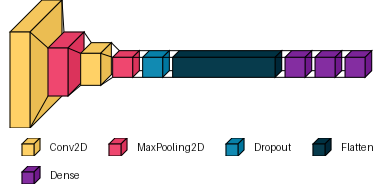

In [18]:
visualkeras.layered_view(model, legend=True)

Treinamento do modelo com **conjunto de validação**

![Conjunto de Treinamento, Validação e Teste](https://telescopeinstorage.blob.core.windows.net/datasets/validation-set-768x242.jpeg)

In [19]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs=20, batch_size=500)

Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.5342 - loss: 1.3933 - val_accuracy: 0.9545 - val_loss: 0.1640
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9515 - loss: 0.1686 - val_accuracy: 0.9719 - val_loss: 0.0910
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9684 - loss: 0.1030 - val_accuracy: 0.9807 - val_loss: 0.0674
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9770 - loss: 0.0764 - val_accuracy: 0.9814 - val_loss: 0.0611
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9793 - loss: 0.0666 - val_accuracy: 0.9837 - val_loss: 0.0518
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9839 - loss: 0.0508 - val_accuracy: 0.9847 - val_loss: 0.0491
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9854 - loss: 0.0463 - val_accuracy: 0.9876 - val_loss: 0.0436
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9875 - loss: 0.0402 - val_accuracy: 0.9882 - val_l

Plotagem da acurácia de Treinamento e Validação

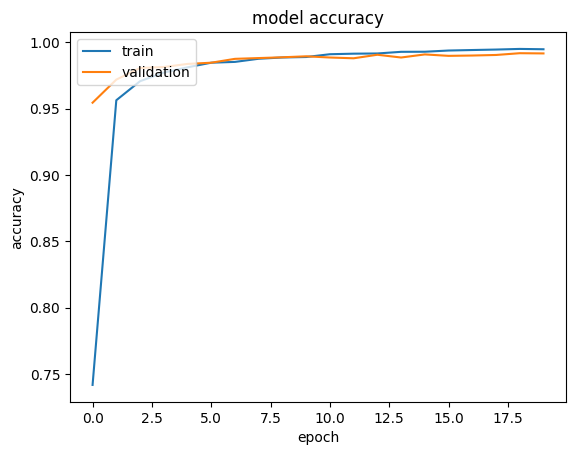

In [20]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Avaliação final do modelo no conjunto de testes

In [21]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

Erro da CNN: 0.74%
Acurária da CNN: 99.26%


In [22]:
scores

[0.02197270095348358, 0.9926000237464905]

Salva o modelo

In [23]:
model.save('MNIST.hdf5', )

In [24]:
model_loaded  = load_model('MNIST.hdf5')

#Visualização dos Outputs das Camadas Convolucionais - Feature Maps

In [25]:
from keras import Model

In [26]:
def visualize_feature_maps(layer_index, sample_index):
  #Cria um novo modelo usando a camada de entrada da rede e saída a partir do índice forncedido
  feat_model = Model(inputs=model_loaded.inputs, outputs=model_loaded.layers[layer_index].output)\

  sample = X_test[sample_index]
  #print(sample.shape)

  sample = np.expand_dims(sample, axis=0)
  #print(sample.shape)

  intermeditade_pred = feat_model.predict(sample)
  #print(intermeditade_pred.shape)

  fig = plt.figure(figsize=(20, 8))
  lines = int(intermeditade_pred.shape[3]/8)

  for i in range(intermeditade_pred.shape[3]):
      ax = fig.add_subplot(lines, 8, i + 1)
      ax.imshow(intermeditade_pred[0,:,:,i]) #, cmap = plt.get_cmap('gray')

  print(intermeditade_pred[0,:,:,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


[[3.80296707e-02 3.80296707e-02 3.80296707e-02 3.80296707e-02
  3.80296707e-02 3.87696922e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.28383525e-02 3.80296707e-02 3.80296707e-02
  3.80296707e-02 3.80296707e-02 3.80296707e-02 3.80296707e-02]
 [3.80296707e-02 3.80296707e-02 3.80296707e-02 3.80296707e-02
  3.87696922e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.80296707e-02 3.80296707e-02
  3.80296707e-02 3.80296707e-02 3.80296707e-02 3.80296707e-02]
 [3.80296707e-02 3.80296707e-02 3.80296707e-02 2.75211483e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

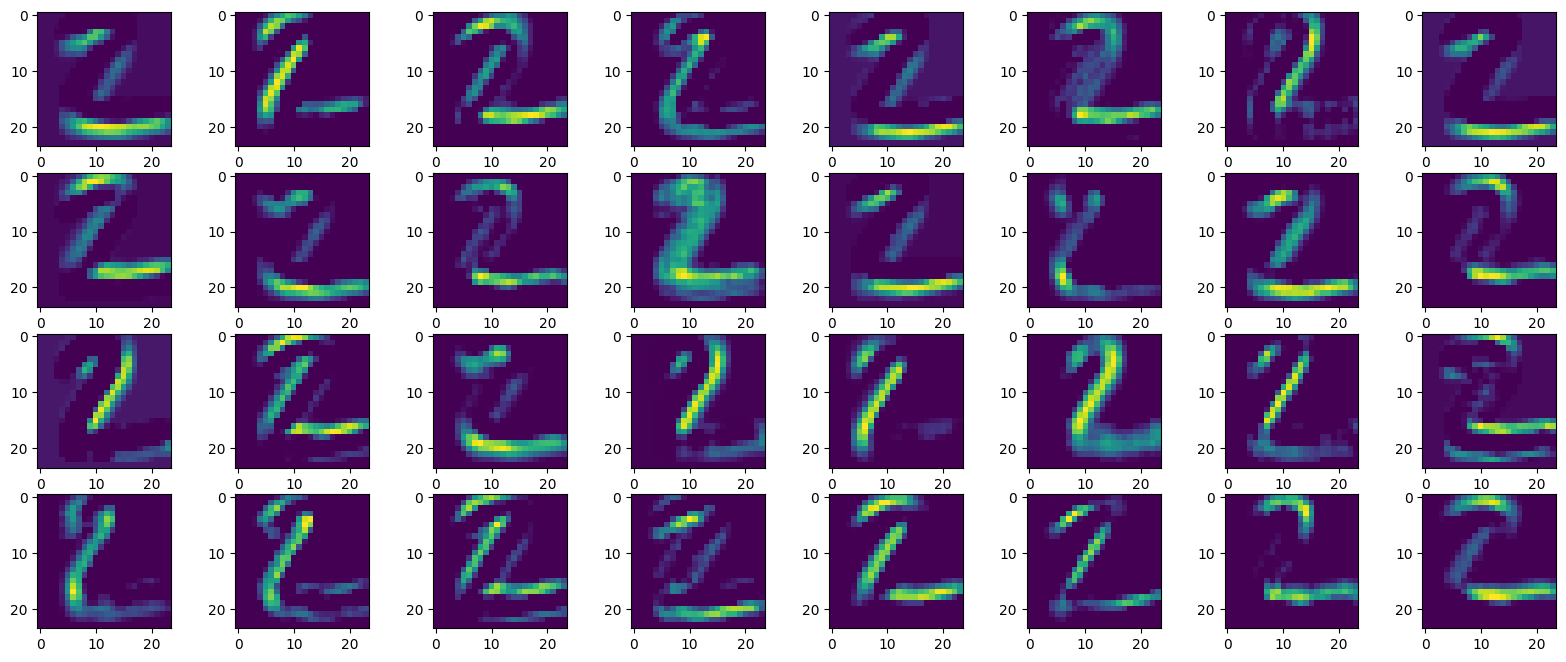

In [27]:
# model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
visualize_feature_maps(0,1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
[[0.03802967 0.03802967 0.03802967 0.         0.         0.
  0.         0.         0.01283835 0.03802967 0.03802967 0.03802967]
 [0.03802967 0.03802967 0.         0.         0.4181932  0.8561908
  0.5005958  0.         0.         0.03802967 0.03802967 0.03802967]
 [0.03802967 0.08616291 0.49278674 0.76171774 0.8628069  0.86244804
  0.3464567  0.         0.08651211 0.03802967 0.03802967 0.03802967]
 [0.03802967 0.09634688 0.45533633 0.57920134 0.4817222  0.
  0.         0.2820464  0.268151   0.03802967 0.03802967 0.03802967]
 [0.03802967 0.03802967 0.05857499 0.05488507 0.         0.
  0.27108282 0.4748592  0.2436037  0.03802967 0.03802967 0.03802967]
 [0.03802967 0.03802967 0.03802967 0.         0.         0.03610456
  0.41393775 0.3993568  0.07631651 0.03802967 0.03802967 0.03802967]
 [0.03802967 0.03802967 0.03419002 0.         0.         0.2743863
  0.3417908  0.1404499  0.03802967 0.03802967 0.03802967 0.03802967]
 [0.03802967 0.03802967 0.  

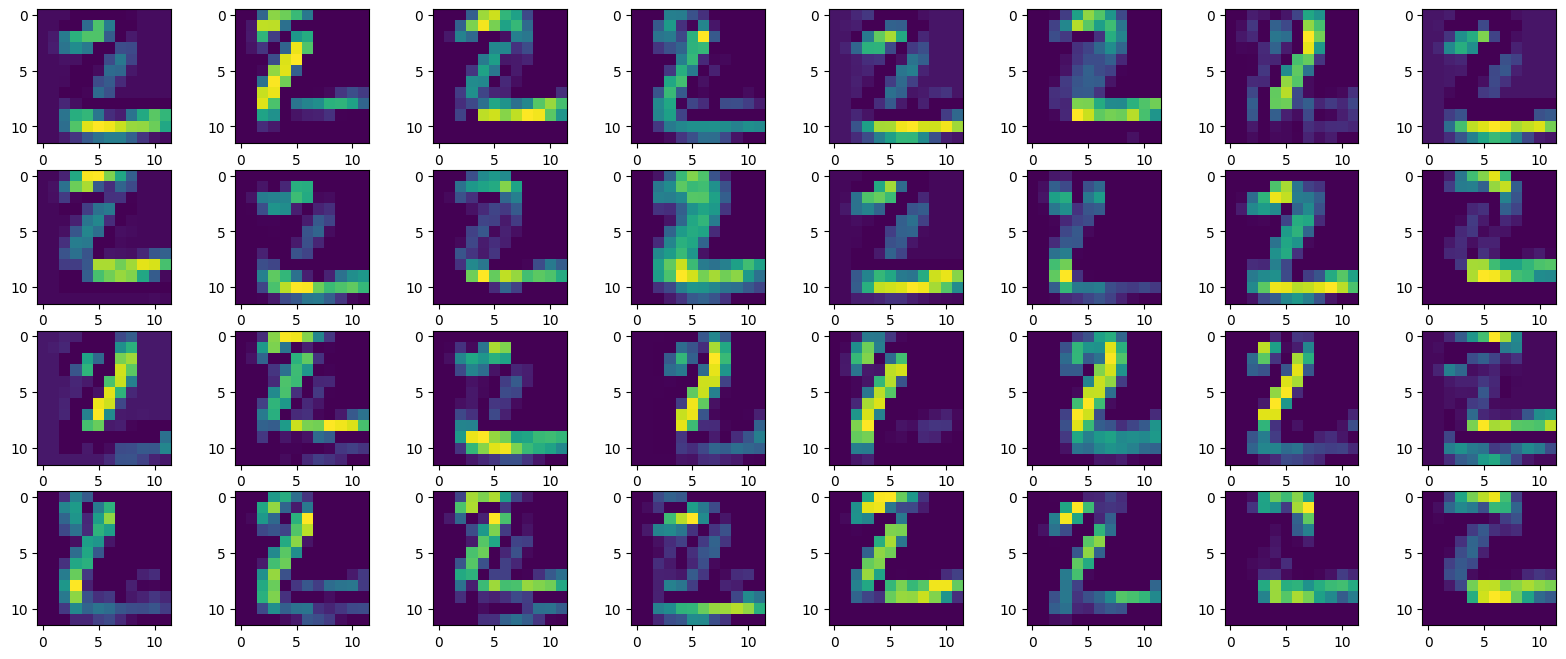

In [28]:
# model.add(MaxPooling2D(pool_size=(2, 2)))
visualize_feature_maps(1,1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
[[0.26849422 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         2.5860858  0.59896284 0.
  0.         0.        ]
 [0.         0.         1.5783933  2.1867857  0.         0.
  0.         0.        ]
 [0.         1.5496186  2.5443103  0.         0.         0.
  0.         0.        ]
 [0.6087672  2.0364566  0.         0.         0.         0.
  0.         0.        ]
 [1.5752984  1.0931804  0.         0.         0.         0.
  0.         0.        ]
 [1.1482892  0.         0.         0.         0.         0.
  0.         0.        ]
 [0.33405596 0.         0.         0.         0.         0.
  0.         0.        ]]


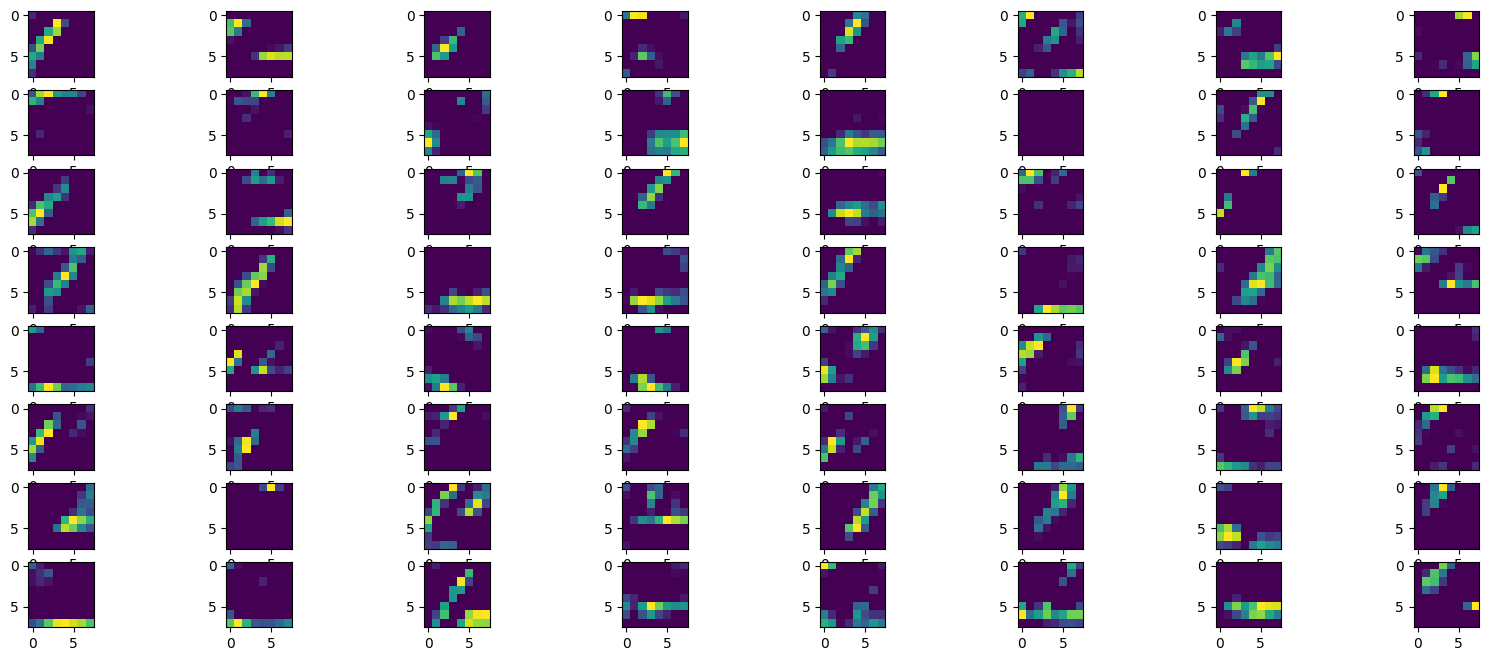

In [29]:
# model.add(Conv2D(64, (5, 5), activation='relu'))
visualize_feature_maps(2,1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
[[0.26849422 2.5860858  0.59896284 0.        ]
 [1.5496186  2.5443103  0.         0.        ]
 [2.0364566  0.         0.         0.        ]
 [1.1482892  0.         0.         0.        ]]


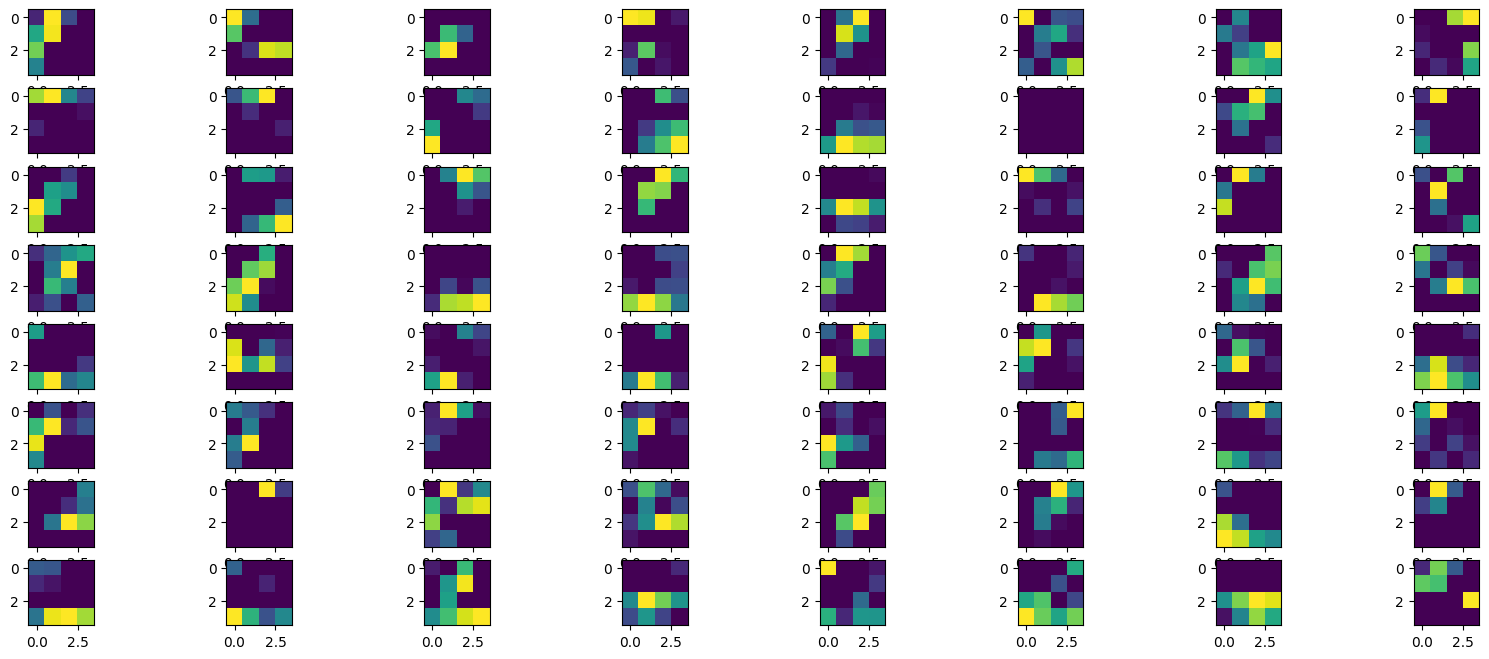

In [30]:
# model.add(MaxPooling2D(pool_size=(2, 2)))
visualize_feature_maps(3,1)